# Лекция 3. Визуализация (графики, графики и ещё раз графики)

В этой лекции глянем, как и с помощью каких библиотек можно отрисовывать графики и что это нам может дать

в терминале Visual Studio Code:
 * pip install pandas
 * pip install numpy
 * pip install matplotlib
 * pip install plotly
 * pip install nbformat

в первой ячейке Google Colab:
 * !pip install plotly

In [ ]:
#импорт библиотек
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
#титаник
titanic=pd.read_csv(r'C:\Users\svege\OneDrive\Рабочий стол\ml ithub\data\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
* Name — имя;
* Sex — пол;
* Age — возраст;
* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
* Parch — количество родителей, детей (в том числе приемных) на борту титаника;
* Ticket — номер билета;
* Fare — плата за проезд;
* Cabin — каюта;
* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

C помощью каких библиотек можно сделать график?
* matplotlib - стандарт в отображение графиков
* seaborn - более широкая палитра графиков
* plotly - программисткий вариант (используется в дашбордах+проектах на Javascript)
* к тому же и в пандасе есть набор базовых графиков

Ссылочки для ознакомления с каждой библиотекой:
* matplotlib - https://proglib.io/p/vasha-povsednevnaya-shpargalka-po-matplotlib-2021-02-04
* seaborn - https://habr.com/ru/company/otus/blog/540526/
* plotly - https://habr.com/ru/post/502958/
* pandas - https://python-school.ru/blog/data-vizualization-basic-pandas/

## Линейный график (line plot)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


дети - до 15
молодежь - 15-30
работяги - 30-50
песок/бабушки - 50+

In [ ]:
age_group = []
for a in titanic['Age']:
    if a<15:
        age_group.append('дети')
    elif a>=15 and a<30:
        age_group.append('молодежь')
    elif a>=30 and a<50:
        age_group.append('работяги')
    elif a>=50:
        age_group.append('песок')
    else:
        age_group.append('не указано')
titanic['age_group']=age_group
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,молодежь
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,работяги
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,молодежь
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,работяги
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,работяги


In [ ]:
mean_fare_by_age_group=titanic.groupby(by='age_group').agg(
    {
        'Fare':'mean'
    }
).sort_values(by='Fare',ascending=False)
mean_fare_by_age_group

,Fare
age_group,
песок,46.364415
работяги,39.551611
дети,31.704435
молодежь,28.571104
не указано,22.158567


<AxesSubplot: xlabel='age_group'>

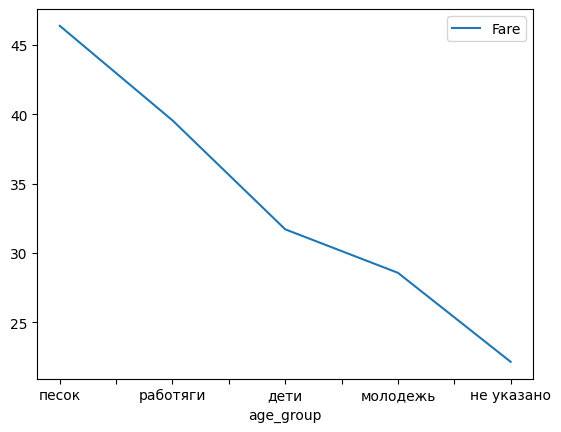

In [ ]:
mean_fare_by_age_group.plot()

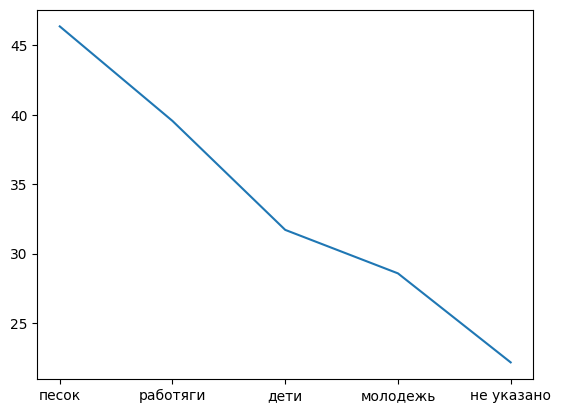

In [ ]:
#matplotlib
plt.plot(mean_fare_by_age_group.index,mean_fare_by_age_group['Fare'])

In [ ]:
px.line(x=mean_fare_by_age_group.index, y=mean_fare_by_age_group['Fare']).show()

In [ ]:
#несколько линий
random_y = np.linspace(0, 100, len(mean_fare_by_age_group['Fare']))

#plotly go

fig = go.Figure() #фигура
fig.add_trace(go.Scatter(x=mean_fare_by_age_group.index, y=mean_fare_by_age_group['Fare'],
                    mode='lines',
                    name='mean_fare'))
fig.add_trace(go.Scatter(x=mean_fare_by_age_group.index, y=random_y,
                    mode='lines+markers',
                    name='numbers'))
fig.show()

## Точечный график (scatter plot)

In [ ]:
fig = px.scatter(x=titanic['Age'], y=titanic['Fare'],size=titanic['Pclass'],symbol=titanic['Survived'])
#параметры size,color,symbol
fig.show()

In [ ]:
px.scatter(titanic,x='Embarked',y='Fare')

## Круговая диаграмма (Pie Chart)

In [ ]:
count_pclass = titanic['Survived'].value_counts()
fig = px.pie(count_pclass, values=count_pclass, names=count_pclass.index, 
             title='Кол-во пассажиров каждого класса')
fig.show()

## Гистограмма (Bar Chart)

In [ ]:
fig = px.bar(count_pclass, x=count_pclass.index, y=count_pclass)
fig.show()

In [ ]:
fig = px.bar(titanic, x='Pclass', y='Age',color='Survived', height=400)
fig.show()

## Гистограмма частот

In [ ]:
fig = px.histogram(titanic, x="Age")
fig.show()

In [ ]:
from IPython.display import Image
Image(url='https://habrastorage.org/r/w1560/getpro/habr/post_images/4f6/5f4/edb/4f65f4edb921715dbb56a320a65b101e.png')

Почитать про виды распределений - https://habr.com/ru/post/331060/

## Ящик с усами (Box plot)

In [ ]:
Image(url='https://static.tildacdn.com/tild6238-6333-4565-a133-383861366131/image.png')

In [ ]:
salary = [30,40,50,30,80,500,1500]
print(sum(salary)/len(salary))
30 30 40 50 80 500 1500

358.3333333333333


In [ ]:
#среднее значение, медиана? мода?
print('Среднее:',titanic['Fare'].mean())
print('Медиана:',titanic['Fare'].median())
print('Мода:',titanic['Pclass'].mode())

Среднее: 32.204207968574636
Медиана: 14.4542
Мода: 0    3
Name: Pclass, dtype: int64


In [ ]:
px.box(titanic,y='Age')

* q1 - нижний квартиль - это такое значение, ниже которого только 25% значений
* q2 - верхний квартиль - выше только 25% значений
* межквартильный размах (МКР) – это разница между 75% и 25% квартилем
* выбросы - это нетипичные наблюдения. Что именно считать нетипичным? Зависит от контекста, но можно прибегнуть к следующем расчетам:
Выбросы – это значения за пределами:
* 25% перцентили минус 1.5 х МКР
* 75% перцентили плюс 1.5 х МКР

In [ ]:
fig = px.box(titanic, x='Survived', y='Fare')
fig.show()

## ЛР1 - Аналитический отчет

* найти набор данных (датасет) - у каждого студента свой индивидуальный набор данных
* провести анализ данных с помощью Pandas/Numpy (включающий также визуализацию данных)
* проведенный анализ представить в виде записки Jupiter Notebook

Требования к анализу:
* Представлен набор данных не менее 300 строк(объектов) и не менее 5 признаков(столбцов)
* В анализе используются способы фильтрации, сортировки и группировки
* Построена сводная таблица
* Используется минимум три вида графиков
* и самое главное - анализ должен быть логически обоснованным

Статья про топ источников данных - https://nuancesprog.ru/p/4258/